In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import csv 



In [3]:
path = "~/papers/did-you-mean-2022/figures/results/sql_bin_info.csv"

df = pd.read_csv(path)

df['PercEasy'] = df['Easy'] / df['All']
df['PercMedium'] = df['Medium'] / df['All']
df['PercHard'] = df['Hard'] / df['All']
df['PercExtra'] = df['Extra'] / df['All']

df['PercEasyGlobal'] = df['Easy'] / df['Easy'].sum()
df['PercMediumGlobal'] = df['Medium'] / df['Medium'].sum()
df['PercHardGlobal'] = df['Hard'] / df['Hard'].sum()
df['PercExtraGlobal'] = df['Extra'] / df['Extra'].sum()

df['CalErr'] = df['Confidence'] - df['AllEM']
df['CalErr'] = df['CalErr'].abs()
# make data tidy 
bin_df = df.melt(id_vars=['BinNum'], value_vars = list(df.columns)[1:], var_name="type", value_name="value")
conf_df = df.melt(id_vars=['Confidence'], value_vars = list(df.columns)[2:], var_name="type", value_name="value")
err_df = df.melt(id_vars=['CalErr'], value_vars = [x for x in df.columns if x != "CalErr"], var_name='type', value_name='value' )

## Key questions
1. How does the percentage of Easy, Medium, Hard, Extra examples change across confidence bins? Are easy programs high-confidence, hard programs low-confidence? 

The first plot shows the percentage of examples in a bin that fall into each example type (e.g. divide by total number of examples in bin).
The second plot shows the percentage of all examples of that type that fall into in each bin (e.g. divide by total number of Easy examples)

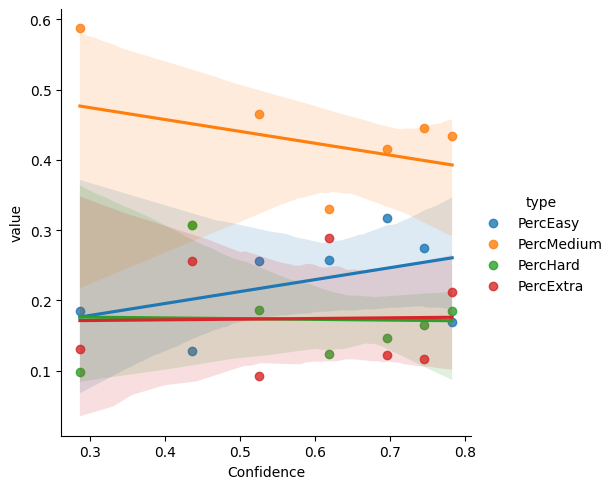

In [7]:
# plot easy, medium, hard, extra percentages 
conf_df_subset = conf_df[conf_df['type'].isin(['PercEasy', 'PercMedium', 'PercHard', 'PercExtra'])]
# fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.lmplot(data=conf_df_subset, 
            x="Confidence", 
            y="value", 
            hue="type",
            scatter=True)
            # linewidth=4)
sns.despine()



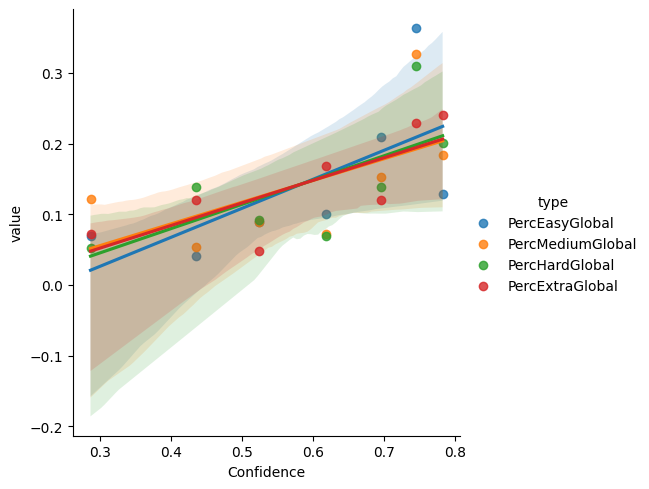

In [9]:
# plot easy, medium, hard, extra percentages 
conf_df_subset = conf_df[conf_df['type'].isin(['PercEasyGlobal', 'PercMediumGlobal', 'PercHardGlobal', 'PercExtraGlobal'])]
# fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.lmplot(data=conf_df_subset, 
            x="Confidence", 
            y="value", 
            hue="type",
            scatter=True)
sns.despine()
# ax.legend(frameon=False)



## Question 1 Answers
From first plot, no clear relationship between the confidence and the local percentage. Weakly, percentage of easy examples increases slightly as confidence increases (but non-monotonically)

From the second plot, all global percentages are pretty tightly correlated. As confidence increases, there are just more examples (except highest bin). No clear signal that a greater percentage of global hard/extra-hard examples are contained in lower-confidence bins.

## Question 2
How is accuracy correlated with confidence for each difficulty? As the confidence increases, do we see greater accuracy on hard examples? Do easy examples (relatively) do better at low confidence? 

Why are we asking these questions? One hypothesis for the poor calibration seen on SQL is that some examples are very easy and some are very hard. It could be the hard examples driving the poor calibration, i.e. the model has high confidence on hard examples (which are unlikely to be correct). 
We want to check whether confidence and accuracy are correlated for each example type, i.e. whether the model is calibrated for some subset of examples (i.e. easy examples) and not calibrated for another subset (i.e. hard examples). 

These plots show execution acccuracy and exact match accuracy by confidence (per bin)

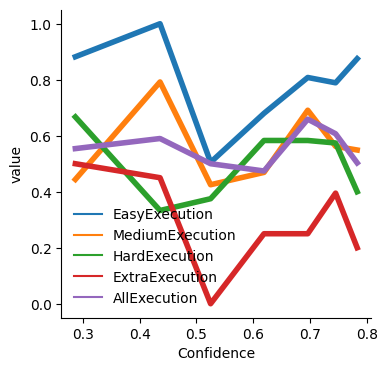

In [25]:
# plot execution accuracy
conf_df_subset = conf_df[conf_df['type'].isin(['EasyExecution', 'MediumExecution', 'HardExecution', 'ExtraExecution', 'AllExecution'])]
fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.lineplot(data=conf_df_subset, 
            x="Confidence", 
            y="value", 
            hue="type",
            linewidth=4)
sns.despine()
ax.legend(frameon=False)



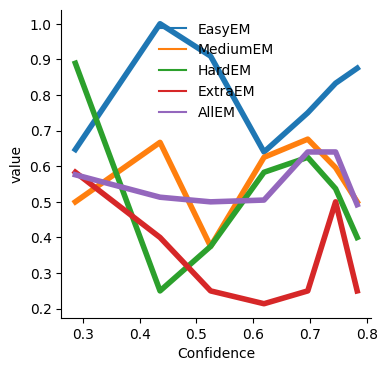

In [26]:
# plot exact match accuracy
conf_df_subset = conf_df[conf_df['type'].isin(['EasyEM', 'MediumEM', 'HardEM', 'ExtraEM', 'AllEM'])]
fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.lineplot(data=conf_df_subset, 
            x="Confidence", 
            y="value", 
            hue="type",
            linewidth=4)
sns.despine()
ax.legend(frameon=False)



## Question 2 Answers
There seems to be no clear correlation between accuracy and confidence for any of these groups. All trends are very non-monotonic. 

This means that poor calibration (which is driven by lower accuracy than confidence) is not being driven by a particular group of examples, as grouped by the target-side difficulty.
This suggests that the difficulty of the SQL is not a major factor in calibration performance. 

## Question 3: What's the calibration error for each subset? 

Do easy examples have a higher calibration error than hard examples? 

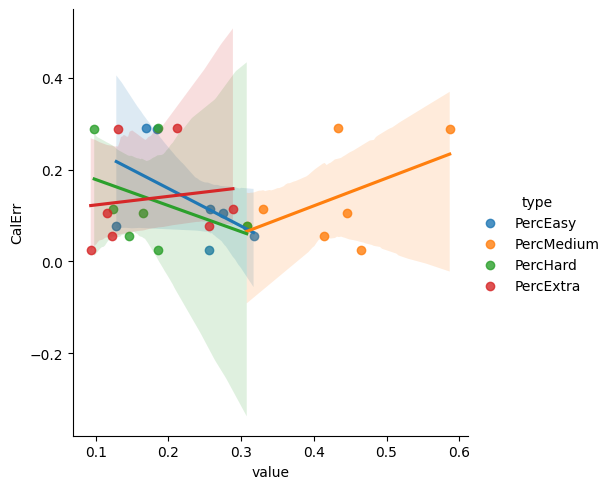

In [13]:
err_df_subset = err_df[err_df['type'].isin(["PercEasy", "PercMedium", "PercHard", "PercExtra"])]

sns.lmplot(data=err_df_subset, 
            x="value", 
            y="CalErr", 
            hue="type",
            scatter=True)